In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import time
import os
import glob

In [2]:
def svdCompact(A):
    m, n = A.shape
    if m > n:
        M1 = A.T@A
        D, V = np.linalg.eig(M1)
        const = n*np.max(D)*2.22e-16
        y = (D>const)
        rA = np.sum(y)
        D = y*D
        idx = D.argsort()[::-1]   
        D = D[idx]
        V = V[idx]
        Vr = V[:,:rA]
        Sr = np.diag(D[:rA])
        Ur = (1/D[:rA])*(A@Vr)
    else:
        M1 = A@A.T
        D, V = np.linalg.eig(M1)
        const = n*np.max(D)*2.22e-16
        y = (D>const)
        rA = np.sum(y)
        D = y*D
        idx = D.argsort()[::-1]   
        D = D[idx]
        U = V[idx]
        Ur = U[:,:rA]
        Sr = np.diag(D[:rA])
        Vr = (1/D[:rA]).T@A@Ur
        
    return Vr, Sr, Ur

In [3]:
A = np.array([[2, 1, 2], [2, -2, 2], [-2, -1, -2], [2, 0, 2]])

In [4]:
print(svdCompact(A))

(array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678],
       [ 0.        ,  0.        ]]), array([[32.,  0.],
       [ 0.,  6.]]), array([[ 0.06629126, -0.11785113],
       [ 0.        , -0.47140452],
       [-0.06629126,  0.11785113],
       [ 0.04419417, -0.23570226]]))


In [5]:
def grafica_tiempos():
    dimensiones = range(5,13)
    tiempos_svd = []
    tiempos_svd_compacta = []
    for i in dimensiones:
        A = np.random.rand(i,i-1)
        start = time.time()
        np.linalg.svd(A)
        finish = time.time()
        svdCompact(A)
        finish2 = time.time()
        tiempos_svd.append(finish - start)
        tiempos_svd_compacta.append(finish2 - finish)
    
    plt.plot(dimensiones, tiempos_svd, 'r-',label="Numpy")
    plt.plot(dimensiones, tiempos_svd_compacta, 'b-', label="SVD Compacta")
    plt.title("Tiempos de ejecución de métodos de SVD")
    plt.xlabel("Dimensiones")
    plt.ylabel("Tiempo(s)")
    plt.legend()
    plt.grid()
    plt.show()

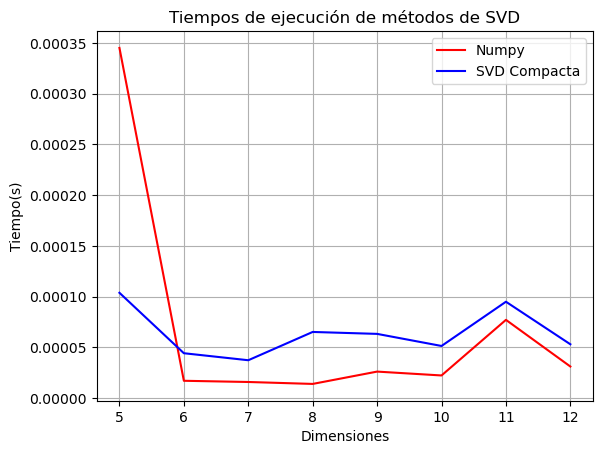

In [6]:
grafica_tiempos()

In [117]:
S = np.empty((10304, 360))
training_folder = os.getcwd() + "/training"
idx=0
for i in range(1, 41):
    subdirectory = os.path.join(training_folder, f"s{i}")
    pattern = os.path.join(subdirectory, "*.jpg")
    files = glob.glob(pattern)
    
    for file in files:
        image = np.asarray(PIL.Image.open(file)).reshape(-1,1)
        S[:,idx:idx+1] = image
        idx+=1

In [118]:
A = S - S.mean(axis=1).reshape(-1,1)

In [47]:
U, Sr, V = np.linalg.svd(A)

In [119]:
def show_face(face_image):
    image = face_image.reshape(112,92)
    plt.imshow(image, cmap="gray")
    plt.axis("off")

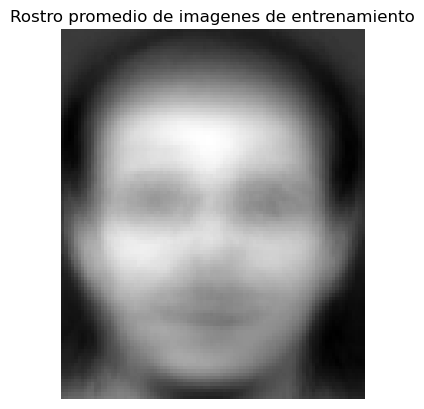

In [120]:
plt.clf()
show_face(S.mean(axis=1))
plt.title("Rostro promedio de imagenes de entrenamiento")
plt.show()

## Rango de A

In [67]:
m = len(S)
r = len((Sr > m * 2.2e-16 * Sr[0]))

## Vectores x

In [95]:
x = U[:,:r].T@A

In [124]:
x_sample = U[:,:r].T@A[:,78].reshape(-1,1)

## Índice de error mínimo

In [114]:
def best_coordinate(face_sample):
    err = np.empty(m)
    for i in range(m):
        err[i]=np.linalg.norm(x_sample - x[:,i].reshape(-1,1))
    return np.where(err == err.min())[0]

## Resultados

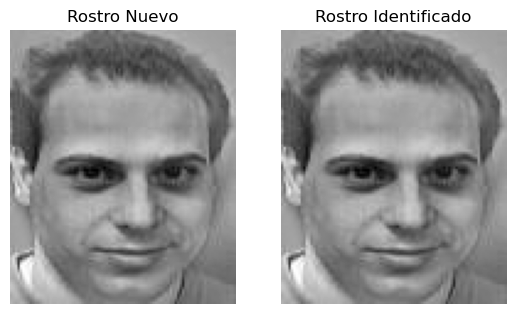

In [126]:
plt.clf()
plt.subplot(1,2,1)
show_face(A[:,78])
plt.title("Rostro Nuevo")
plt.subplot(1,2,2)
plt.title("Rostro Identificado")
show_face(A[:,best_coordinate(x_sample)])
plt.show()

In [39]:
fp = U[:,:r]@x

In [43]:
epsilon_f = np.linalg.norm(A-fp)

In [44]:
epsilon_f

3.17076511046403e-10